In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white')

# S7 - Myh9 insertions

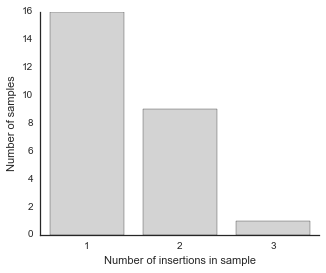

In [2]:
insertions = pd.read_csv('../data/processed/sb/shear_splink/all/insertions.cis.rbm.txt', sep='\t')

fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=(insertions.query('gene_name == "Myh9"')
                              .groupby('sample')['id'].nunique()
                              .to_frame(name='count')),
              x='count', color='lightgrey', ax=ax)
sns.despine()

ax.set_xlabel('Number of insertions in sample')
ax.set_ylabel('Number of samples');

In [3]:
with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(2.5, 2))
    sns.countplot(data=(insertions.query('gene_name == "Myh9"')
                                  .groupby('sample')['id'].nunique()
                                  .to_frame(name='count')),
                  x='count', color='lightgrey', ax=ax)
    sns.despine()

    ax.set_xlabel('Number of insertions in sample')
    ax.set_ylabel('Number of samples');
    
    fig.savefig('../reports/supplemental/figures/fig_s7_myh9_insertions.pdf',
                bbox_inches='tight')
    plt.close(fig)

# Strain/subtype bias

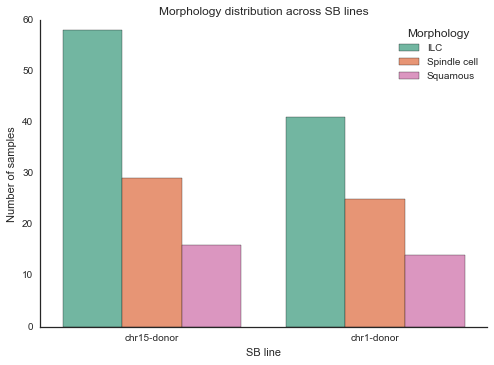

In [49]:
from matplotlib import pyplot as plt

from nbsupport.morphology import parse_morphology, MORPHOLOGY_ORDER, MORPHOLOGY_COLORS

# Read sample definition.
samples = pd.read_csv('../data/raw/sb/samples.txt', sep='\t')

# Define morphology annotation, melt to tidy (long) format.
morphology = (parse_morphology(samples)
              .reset_index()
              .pipe(pd.melt, id_vars='sample', var_name='morphology')
              .query('value == True')
              .drop('value', axis=1))

# Merge with strain info.
morphology = pd.merge(samples[['sample', 't2onc_type']], morphology, how='left')

# Plot.
fig, ax = plt.subplots()

sns.countplot(data=morphology, x='t2onc_type', hue='morphology',
              hue_order=MORPHOLOGY_ORDER, palette=MORPHOLOGY_COLORS)

ax.set_xlabel('SB line')
ax.set_ylabel('Number of samples')
ax.set_title('Morphology distribution across SB lines')
ax.legend(title='Morphology')
sns.despine(fig)

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(4, 3))
   
    sns.countplot(data=morphology, x='t2onc_type', hue='morphology',
                  hue_order=MORPHOLOGY_ORDER, palette=MORPHOLOGY_COLORS)

    ax.set_xlabel('SB line')
    ax.set_ylabel('Number of samples')
    ax.set_title('Morphology distribution across SB lines')
    ax.legend(title='Morphology')
    sns.despine(fig)
    
    fig.savefig('../reports/supplemental/figures/fig_sx_donor_morphology.pdf', bbox_inches='tight')
    plt.close(fig)

In [50]:
from nbsupport.morphology import test_strain_bias

test_strain_bias(morphology, value='morphology', incl_neg=False)

pos_chr1-donor  pos_chr15-donor   p_value   q_value
morphology                                                       
ILC                       41               58  0.495455  0.676226
Spindle cell              25               29  0.584011  0.676226
Squamous                  14               16  0.676226  0.676226

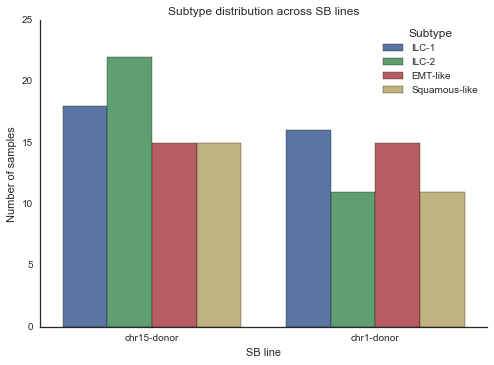

In [51]:
from nbsupport.expression.subtypes import SUBTYPE_ORDER, SUBTYPE_COLORS

# Read subtypes and merge with strain info.
subtypes = (pd.read_csv('../data/processed/sb/nmf/subtypes.txt', sep='\t')
              .rename(columns={'Unnamed: 0': 'sample'}))

subtypes = pd.merge(samples[['sample', 't2onc_type']], 
                    subtypes[['sample', 'subtype']],
                    on='sample', how='left')

# Plot.
fig, ax = plt.subplots()
sns.countplot(data=subtypes, x='t2onc_type', hue='subtype',
              hue_order=SUBTYPE_ORDER, palette=SUBTYPE_COLORS)
ax.set_xlabel('SB line')
ax.set_ylabel('Number of samples')
ax.set_title('Subtype distribution across SB lines')
ax.legend(title='Subtype')
sns.despine(fig)

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(4, 3))
    
    sns.countplot(data=subtypes, x='t2onc_type', hue='subtype',
                  hue_order=SUBTYPE_ORDER, palette=SUBTYPE_COLORS)

    ax.set_xlabel('SB line')
    ax.set_ylabel('Number of samples')
    ax.set_title('Subtype distribution across SB lines')
    ax.legend(title='Subtype')
    sns.despine(fig)
    
    fig.savefig('../reports/supplemental/figures/fig_sx_donor_subtypes.pdf', bbox_inches='tight')
    plt.close(fig)

In [52]:
test_strain_bias(subtypes, value='subtype', incl_neg=False)

pos_chr1-donor  pos_chr15-donor   p_value   q_value
subtype                                                           
EMT-like                   15               15  0.403371  0.806742
ILC-1                      16               18  0.684632  0.912843
ILC-2                      11               22  0.220706  0.806742
Squamous-like              11               15  1.000000  1.000000

# GEMM/Intraductal morphology

In [55]:
samples = (pd.read_csv('../data/raw/sb/samples_validation.txt', sep='\t')
             .assign(sample=lambda df: df['mouse'] + '-' + df['block'].astype(str))
             .query('pathology_type != "no tumor"'))

samples.groupby('genotype').size()

genotype
WcrH;Ecad;Aspp2    30
WcrH;Ecad;Mypt1    27
pLCG sgMyh9        11
dtype: int64

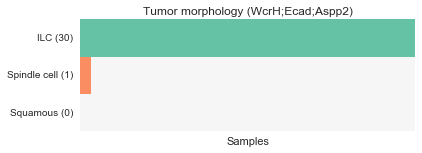

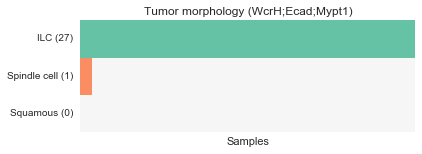

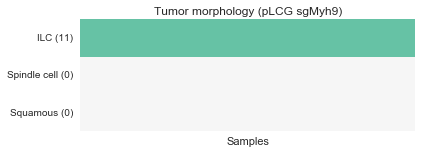

In [62]:
from nbsupport.morphology import parse_morphology, plot_morphology

for genotype, grp in samples.groupby('genotype'):
    fig, ax = plt.subplots(figsize=(6, 2))
    plot_morphology(parse_morphology(grp), ax=ax)
    ax.set_title('Tumor morphology ({})'.format(genotype))

with sns.plotting_context('paper', font_scale=0.7):
    for genotype, grp in samples.groupby('genotype'):
        fig, ax = plt.subplots(figsize=(4, 1))
        plot_morphology(parse_morphology(grp), ax=ax)
        ax.set_title('Tumor morphology ($\it{{{}}}$)'.format(genotype))
        
        # ax.set_title('Tumor morphology ($\it{{{}}}$)'.format(genotype))
    
        fig.savefig('../reports/supplemental/figures/fig_sy_gemm_morph_{}.pdf'
                    .format(re.split(r'[; ]', genotype)[-1].lower()),
                    bbox_inches='tight')
        plt.close(fig)